<a href="https://colab.research.google.com/github/Vixuz144/Simulaci-n-2/blob/main/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instrucciones: Resuelva los ejercicios de manera detallada, clara y completa.

Entregue los programas solicitados vía github.

1. Considere la distribución uniforme U(0, 1) y realice lo que se solicita:
(a) Escriba su función de densidad y su distribución acumulada, y grafíquelas.

Sea $X$ una variable unitaria tal que$$X∼U(0,1)$$ su función de densidad es:

$$f(x) = \frac{1}{b-a} = \frac{1}{1-0} = 1$$

y su función de densidad acumulada o función de distribución es:

$$ F(x) = \int_{-∞}^x f(y) dy = \int_0^x (1) dx = x $$

(b) Calcule su media y su varianza.

$$ E[x] = ∫_{-∞}^∞xf(x)dx = ∫_0^1 x*(1)dx = \left[ \frac{x^2}{2} \right]_0^x = \frac{1}{2}$$

$$ V[x] = E\left[x^2\right] - \left(E\left[x\right]\right)^2 = ∫_0^1 x^2dx - \left(\frac{1}{2}\right)^2 = \frac{1}{3} - \frac{1}{4} = \frac{1}{12} $$

$$ E\left[x\right] = \frac{1}{2} $$
$$ V\left[x\right] = \frac{1}{12} $$

Text(0.5, 1.0, 'función de densidad acumulada F(x)')

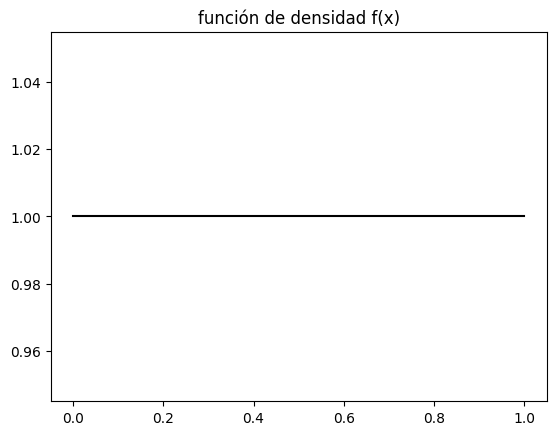

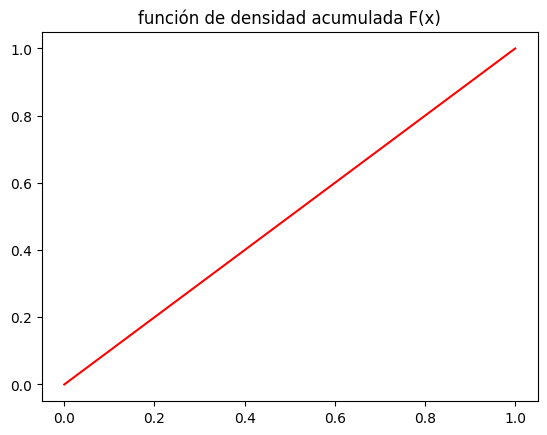

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([0,1], [1,1], color = "k")
plt.title("función de densidad f(x)")

plt.figure()
plt.plot([0,1], [0,1], color = "r")
plt.title("función de densidad acumulada F(x)")

2. Describa el procedimiento a seguir para:

(a) Realizar la Prueba de Bondad de Ajuste χ^2.

Primero, se parte de lo que se desea comprobar. En este caso es la bondad de ajuste, es decir, que tan bien se ajustan los datos proporcionados (también llamados observaciones) a cierta distribución.

Nuestra hipótesis nula se forma de la premisa de que no hay diferencia entre la distribución de estos datos y la distribución uniforme. Por ende la hipóteis alterna nos indica que existe una diferencia entra ambas distribuciones

Una vez aclarado que se desea comprobar, hay que partir el intervalo en el que se encuentran los datos (en este caso $[0,1]$) en n intervalos distintos.

Luego, hay que contar la frecuencia o cantidad de elementos que caen en cada intervalo, para luego calcular  la diferencia de cada frecuencia contada con la frecuencia relativa que se supondría debería de tener. Esta última se calcula al dividir la cantidad total de observaciones u elementos entre la cantidad de intervalos (n).

Posteriormente, se hace el cálculo de la suma del cuadrado de estas diferencias entre la frecuencia relativa. Obteniendo así nuestro estadístico de prueba.

Una vez que se tiene nuestro estadístico, se compara con el valor crítico de la correspondiente distribución (chi cuadrada) para poder determinar si nuestra hipótesis de bondad de ajuste se cumple o no.

En caso de que nuestro estadístico de prueba sea menor al crítico, no se rechaza la hipótesis nula (pero no por ello se acepta), por lo cual no hay evidencia suficiente para creeer que las distribuciones son distintas; mientras que si el estadístico de prueba es mayor que el crítico, se rechaza la hipótesis nula, por enede se concluye que las distribuciones son distintas.

(b) Leer una tabla estadística χ^2.

Se busca en la tabla con el nivel de significancia deseado (α) y se busca en los encabezados de las columnas.

Se calculan los grados de libertad (no. de subintervalos - 1 = n - 1) y se busca en las filas.

El número del recuadro donde coincidan los valores de α y n - 1 será el valor crítico.


3. Realice una prueba de uniformidad χ^2 a los números de la tabla siguiente, con un nivel de aceptación del 95\%

 38 33 25 05 69 35 98 52 12 79

 50 46 95 42 49 11 78 34 02 43

 07 50 05 91 77 18 21 04 17 62

 91 36 48 88 52 76 99 73 82 90

 El estadísitico de prueba es 0.5, mientras que el valor crítico es de 9.49, por lo que no se rechaza que las distribución de la muestra sea normal.


4. Realice una prueba de uniformidad χ^2 a los números de la tabla siguiente, con un nivel de aceptación del 95\%

  0.8797 0.3884 0.6289 0.8750 0.5999 0.8589 0.9996 0.2415 0.3808 0.9606

  0.9848 0.3469 0.7977 0.5844 0.8147 0.6431 0.7387 0.5613 0.0318 0.7401

  0.4557 0.1592 0.8536 0.8846 0.3410 0.1492 0.8681 0.5291 0.3188 0.5992

  0.9170 0.2204 0.5991 0.5461 0.5739 0.3254 0.0856 0.2258 0.4603 0.5027

  0.8376 0.6235 0.3681 0.2088 0.1525 0.2006 0.4720 0.4272 0.6360 0.0954

El estadísitico de prueba es 4.2, mientras que el valor crítico es de 9.49, por lo que no se rechaza que las distribución de la muestra sea normal.
  
5. Escriba un programa en Python para realizar la prueba χ^2.

[9, 7, 9, 7, 8]
0.5
[6, 12, 13, 7, 12]
4.2


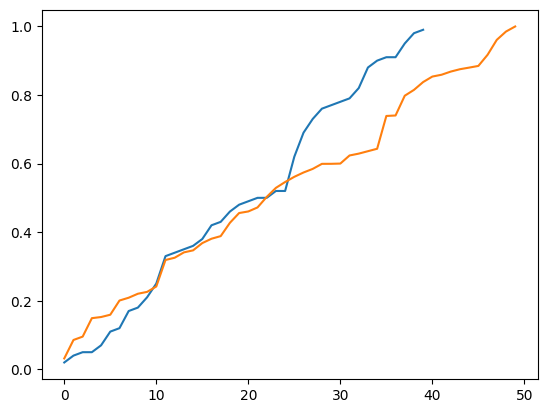

In [ ]:
#prueba chi
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt


def p_chi_unif(data, m, alpha):
  d = np.array(data)
  n = len(data)

  a = np.floor(min(d))
  b = np.ceil(max(d))
  p = (b-a)/m

  o, l1, l2 = [], a, a+p
  for i in range(m):
    o.append(list((d>=l1) == (d<l2)).count(True))
    l1 = l2
    l2 = l2 + p

  print(o)
  e = n/m * np.ones(m)

  dif = o - e

  chi = sum(dif**2)/(n/m)
  return chi

if __name__ == "__main__":
  d = np.array([38, 33, 25, 5, 69, 35, 98, 52, 12, 79, 50, 46, 95, 42, 49, 11,
                78, 34, 2, 43, 7, 50, 5, 91, 77, 18, 21, 4, 17, 62, 91, 36, 48,
                88, 52, 76, 99, 73, 82, 90])/100

  d1 = np.array([0.8797, 0.3884, 0.6289, 0.8750, 0.5999, 0.8589, 0.9996, 0.2415,
                 0.3808, 0.9606, 0.9848, 0.3469, 0.7977, 0.5844, 0.8147, 0.6431,
                 0.7387, 0.5613, 0.0318, 0.7401, 0.4557, 0.1592, 0.8536, 0.8846,
                 0.3410, 0.1492, 0.8681, 0.5291, 0.3188, 0.5992, 0.9170, 0.2204,
                 0.5991, 0.5461, 0.5739, 0.3254, 0.0856, 0.2258, 0.4603, 0.5027,
                 0.8376, 0.6235, 0.3681, 0.2088, 0.1525, 0.2006, 0.4720, 0.4272,
                 0.6360, 0.0954])


  print(p_chi_unif(d, 5, 0.05))
  #print(sc.stats.chisquare(d))
  print(p_chi_unif(d1, 5, 0.05))
  #print(sc.stats.chisquare(d1))

  plt.plot(np.sort(d))
  plt.plot(np.sort(d1))

  #No se rechaza la hipótesis nula, por ende podemos decir que aparentan ser lo suficientemente parecidas a una uniforme